# Sheet12  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numba import njit, jit

1.000010000100001e-05 0.01 0
0.40000400004000036
.
1.000010000100001e-05 0.02 0
0.10000100001000009
.
1.000010000100001e-05 0.03 0
0.04444488889333338
.
1.000010000100001e-05 0.04 0
0.025000250002500023
.


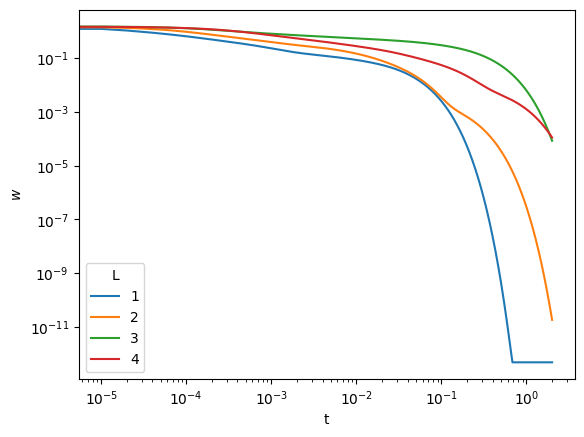

In [ ]:
np.random.seed(42)
num_runs = 1
Ls = [1,2,3,4]
# Ls = [1]
for L in Ls:
    # L = 1
    t_max = 2
    v = 1
    D=  0
    N = 100 + 1
    dt = 1e-5
    time_steps = int(t_max/dt)
    # time_steps = 10000 +1

    t, dt = np.linspace(0,t_max, time_steps,retstep=True)
    x, dx = np.linspace(0,L,N,retstep=True)

    noise_scale = D

    print(dt, dx, noise_scale)
    print(4*dt*v/dx**2)
    w_mean = np.zeros([time_steps])
    for n in range(num_runs):
        h = np.zeros([time_steps, N])
        # h[0] = np.sin(50*x) + np.sin(20*x)
        h[0] = np.random.uniform(0,5,size=[N])

            
        for ti in range (time_steps-1):
            eta = np.random.normal(0,noise_scale,size=[N])
            for xi in range(N):
                h[ti+1, xi%N] = h[ti, xi%N] + dt* (v/(dx**2) * (h[ti, (xi+1)%N] + h[ti, (xi-1)%N] -2* h[ti, xi%N]) + eta[xi%N])
        
        w_mean += np.std(h, axis=1)
        print('.')
    
    # plt.imshow(h[::100,:], origin='lower')
    # plt.ylabel('t')
    # plt.xlabel('x')
    # # plt.colorbar()
    # plt.show()

    # for ti in range(0,time_steps,time_steps//10):
    #     plt.plot(x, h[ti])
    # plt.show()

    # w = np.std(h, axis=1)
    w_mean = w_mean / num_runs
    plt.plot(t, w_mean, label=L)
    
    
plt.xlabel('t')
plt.ylabel('$w$')
# plt.ylim([50, 3000])
plt.loglog()
plt.legend(title='L')
plt.savefig('a_no_noise.png', dpi=600)

1.000010000100001e-05 0.01 1000000000.0
0.40000400004000036
.
.
.
.
.
.
.
.
.
.
1.000010000100001e-05 0.02 1000000000.0
0.10000100001000009
.
.
.
.
.
.
.
.
.
.
1.000010000100001e-05 0.03 1000000000.0
0.04444488889333338
.
.
.
.
.
.
.
.
.
.
1.000010000100001e-05 0.04 1000000000.0
0.025000250002500023
.
.
.
.
.
.
.
.
.
.


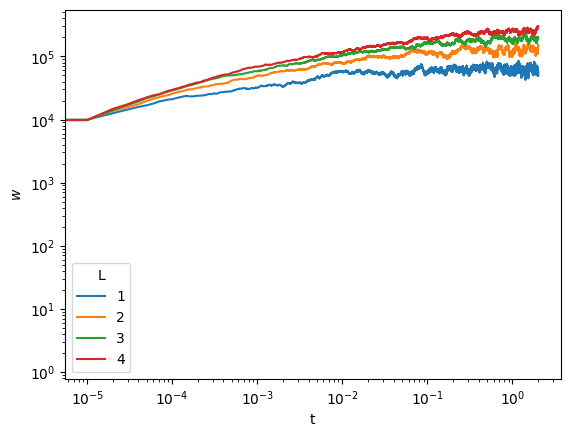

In [13]:
np.random.seed(42)
num_runs = 10
Ls = [1,2,3,4]
# Ls = [1]
for L in Ls:
    # L = 1
    t_max = 2
    v = 1
    D=  1e9
    N = 100 + 1
    dt = 1e-5
    time_steps = int(t_max/dt)
    # time_steps = 10000 +1

    t, dt = np.linspace(0,t_max, time_steps,retstep=True)
    x, dx = np.linspace(0,L,N,retstep=True)

    noise_scale = D

    print(dt, dx, noise_scale)
    print(4*dt*v/dx**2)
    w_mean = np.zeros([time_steps])
    for n in range(num_runs):
        h = np.zeros([time_steps, N])
        # h[0] = np.sin(50*x) + np.sin(20*x)
        h[0] = np.random.uniform(0,5,size=[N])

            
        for ti in range (time_steps-1):
            eta = np.random.normal(0,noise_scale,size=[N])
            for xi in range(N):
                h[ti+1, xi%N] = h[ti, xi%N] + dt* (v/(dx**2) * (h[ti, (xi+1)%N] + h[ti, (xi-1)%N] -2* h[ti, xi%N]) + eta[xi%N])
        
        w_mean += np.std(h, axis=1)
        print('.')
    
    # plt.imshow(h[::100,:], origin='lower')
    # plt.ylabel('t')
    # plt.xlabel('x')
    # # plt.colorbar()
    # plt.show()

    # for ti in range(0,time_steps,time_steps//10):
    #     plt.plot(x, h[ti])
    # plt.show()

    # w = np.std(h, axis=1)
    w_mean = w_mean / num_runs
    plt.plot(t, w_mean, label=L)
    np.save('w_mean_{}'.format(L), w_mean)
    
    
plt.xlabel('t')
plt.ylabel('$w$')
# plt.ylim([50, 3000])
plt.loglog()
plt.legend(title='L')
plt.savefig('a.png', dpi=600)


0.2400723360404876
0.246860611444016
0.2665128191837425
0.27772284264636293


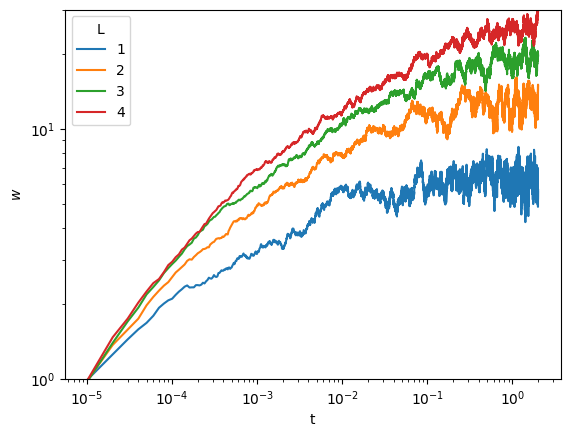

In [86]:
np.random.seed(42)
num_runs = 10
Ls = [1,2,3,4]
# Ls = [1]
for L in Ls:
    # L = 1
    t_max = 2
    v = 1
    D=  1e9
    N = 100 + 1
    dt = 1e-5
    time_steps = int(t_max/dt)
    # time_steps = 10000 +1

    t, dt = np.linspace(0,t_max, time_steps,retstep=True)
    x, dx = np.linspace(0,L,N,retstep=True)

    noise_scale = D

    w_mean = np.load('w_mean_{}.npy'.format(L)) / 10000
    p = np.polyfit(np.log(t[1:1000]), np.log(w_mean[1:1000]), 1)
    print(p[0])

    plt.plot(t, w_mean, label=L)
    
    
plt.xlabel('t')
plt.ylabel('$w$')
plt.ylim([1, 30])
plt.loglog()
plt.legend(title='L')
plt.savefig('a_noise.png', dpi=600)

0.001000010000100001 0.5 200.0
0.016000160001600015
.
.
.
.
.
0.2729038612949529
0.001000010000100001 0.75 200.0
0.00711118222293334
.
.
.
.
.
0.270752408857959
0.001000010000100001 1.0 200.0
0.004000040000400004
.
.
.
.
.
0.34221763009157063
0.001000010000100001 1.5 200.0
0.001777795555733335
.
.
.
.
.
0.34519083136966755


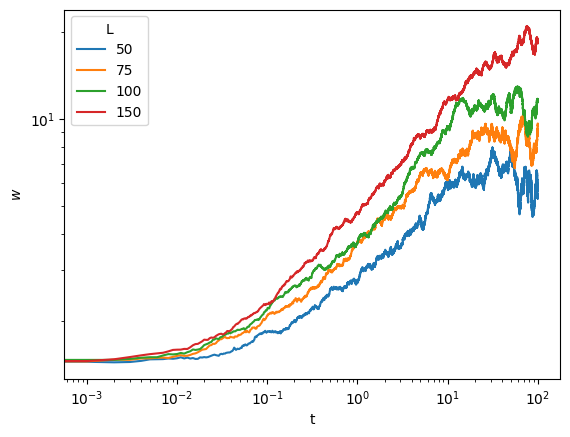

In [129]:
np.random.seed(42)
num_runs = 5
# Ls = [1,2,3,4]
# Ls = [100]
# Ls = [100, 200, 300, 400]
Ls = [50,75, 100, 150]
for L in Ls:
    # L = 1
    t_max = 100
    v = 1
    lamb = 1
    D=  2e2
    N = 100 + 1
    dt = 1e-3
    time_steps = int(t_max/dt)
    # time_steps = 10000 +1

    t, dt = np.linspace(0,t_max, time_steps,retstep=True)
    x, dx = np.linspace(0,L,N,retstep=True)

    noise_scale = D

    print(dt, dx, noise_scale)
    print(4*dt*v/dx**2)
    w_mean = np.zeros([time_steps])
    for n in range(num_runs):
        h = np.zeros([time_steps, N])
        # h[0] = np.sin(50*x) + np.sin(20*x)
        h[0] = np.random.uniform(0,5,size=[N])

            
        for ti in range (time_steps-1):
            eta = np.random.normal(0,noise_scale,size=[N])
            for xi in range(N):
                h[ti+1, xi%N] = h[ti, xi%N] + dt* (v/(dx**2) * (h[ti, (xi+1)%N] + h[ti, (xi-1)%N] -2* h[ti, xi%N]) 
                                                   + lamb/2*((1/(2*dx))*(h[ti, (xi+1)%N] - h[ti, (xi-1)%N]))**2  
                                                   + eta[xi%N])
        
        # for ti in range (time_steps-1):
        #     eta = np.random.normal(0,noise_scale,size=[N])
        #     for xi in range(N):
        #         h[ti+1, xi%N] = h[ti, xi%N] + dt* (v/(dx**2) * (h[ti, (xi+1)%N] + h[ti, (xi-1)%N] -2* h[ti, xi%N]) 
        #                                            + lamb/2*(1/(2*dx**2))*((h[ti, (xi+1)%N] - h[ti, (xi)%N])**2  + (h[ti, (xi)%N] - h[ti, (xi-1)%N])**2 )
        #                                            + eta[xi%N])
        
        w_mean += np.std(h, axis=1)
        print('.')
    
    # plt.imshow(h[::100,:], origin='lower')
    # plt.ylabel('t')
    # plt.xlabel('x')
    # plt.colorbar()
    # plt.show()
    w_mean = w_mean / num_runs
    plt.plot(t, w_mean, label=L)
    p = np.polyfit(np.log(t[1:10000]), np.log(w_mean[1:10000]), 1)
    print(p[0])

    np.save('kpz_w_mean_{}'.format(L), w_mean)
    
    
plt.xlabel('t')
plt.ylabel('$w$')
# plt.ylim([50, 3000])
plt.loglog()
plt.legend(title='L')
plt.savefig('b_with_noise.png', dpi=600)


20000
0.44081352572873894


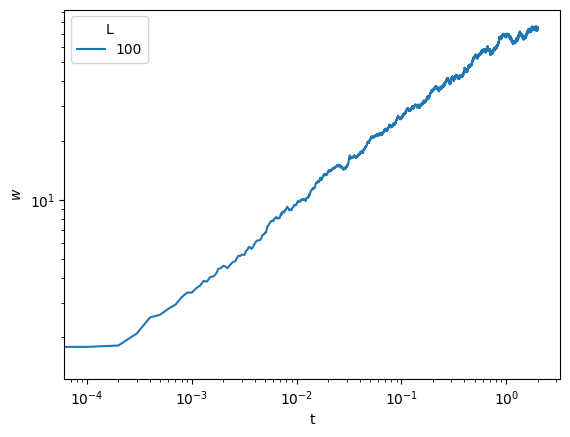

In [82]:
np.random.seed(42)
num_runs = 10
# Ls = [1,2,3,4]
Ls = [100]
for L in Ls:
    # L = 1
    t_max = 2
    v = 1
    D=  1e9
    N = 100 + 1
    dt = 1e-4
    time_steps = int(t_max/dt)
    # time_steps = 10000 +1

    t, dt = np.linspace(0,t_max, time_steps,retstep=True)
    x, dx = np.linspace(0,L,N,retstep=True)

    noise_scale = D

    w_mean = np.load('kpz_w_mean_{}.npy'.format(L)) 
    print(len(w_mean))
    p = np.polyfit(np.log(t[1:1000]), np.log(w_mean[1:1000]), 1)
    print(p[0])

    plt.plot(t, w_mean, label=L)
    
    
plt.xlabel('t')
plt.ylabel('$w$')
# plt.ylim([1, 30])
plt.loglog()
plt.legend(title='L')
plt.savefig('b.png', dpi=600)

In [29]:
L = 1
t_max = 1
v = 1e-3
D=  1e6
N = 100 + 1
time_steps = 10000 +1

t, dt = np.linspace(0,t_max, time_steps,retstep=True)
x, dx = np.linspace(0,L,N,retstep=True)

noise_scale = D*np.sqrt(2*dt)
print(dt, dx, noise_scale)


print(4*dt*v/dx**2)

# h = np.zeros([time_steps, N])
# h[0] = np.sin(50*x) + np.sin(20*x)
h0 = np.random.uniform(0,5,size=[N])

def f(t, y):
    eta = np.random.normal(0,noise_scale,size=[N])
    return v/(dx**2) *(np.roll(y, 1) + np.roll(y,-1) -2* y) + eta

sol = solve_ivp(f, (0,t_max), h0, t_eval=t)

print(sol.y)


plt.imshow(h[::100,:], origin='lower',extent=[0,L,0,1])
plt.ylabel('t')
plt.xlabel('x')
# plt.colorbar()
plt.show()

for ti in range(0,time_steps,time_steps//10):
    plt.plot(x, h[ti])
plt.show()

w = np.std(h, axis=1)
plt.plot(t, w)
plt.xlabel('t')
plt.ylabel('$w^2$')
plt.loglog()


0.0001 0.01 14142.13562373095
0.004


KeyboardInterrupt: 